# Building a Neuron with PyTorch

### Overview

This notebook goes through the concepts of dot product multiplication, machine learning pipeline, data loaders, and model parameter estimation with Gradient Descent. It also implements gradient descent on MNIST images for classification. 


### Objectives:

- Walk through PyTorch fundamental tools and data structures.
- Set up modeling pipeline.
- Implement Gradient Descent with different learning rates.
- Train and test a logisitc regressor neuron for tabulated and image data
- Compare from scratch and PyTorch implementation


### Structure

**Part 1: PyTorch Practice**

**Part 2: From Scratch ML Pipeline**

### Tutorials and Documentation Links For Help

**Here are the links to tutorials:**

- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [Pandas Tutorials](https://github.com/CuriousNeuralNerd/Tutorials/blob/fbdeb171ed16958e7571df0f1272c68ce3f4d3ab/pandas_basics.ipynb)
- [Matplotlib Tutorials](https://github.com/CuriousNeuralNerd/Tutorials/blob/fbdeb171ed16958e7571df0f1272c68ce3f4d3ab/matplotlib_basics.ipynb)
- [scikit-learn Tutorials](https://github.com/CuriousNeuralNerd/Tutorials/blob/fbdeb171ed16958e7571df0f1272c68ce3f4d3ab/scikit_learn_basics.ipynb)


**Here are the links to the official documentation for the libraries:**

- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
- [NumPy Documentation](https://numpy.org/doc/stable/user/absolute_beginners.html)
- [pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [Matplotlib Documentation](https://matplotlib.org/stable/users/explain/quick_start.html)
- [scikit-learn Documentation](https://scikit-learn.org/stable/)

## Libraries

In [2]:
import torch
import torchvision.utils as tv_utils
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

## 1. PyTorch Practice

### 1.1 Dot Product

![Dot Product: Piece by Piece](https://betterexplained.com/wp-content/webp-express/webp-images/uploads/dotproduct/dot_product_components.png.webp)

#### Understanding the Dot Product in Machine Learning

$$
\mathbf{a} \cdot \mathbf{b} = a_x \cdot b_x + a_y \cdot b_y = ||\mathbf{a}|| ||\mathbf{b}|| \cos(\theta)
$$
where
- $\mathbf{a}$ and $\mathbf{b}$ are vectors.
- $a_x$ and $b_x$ are the x-axis component of the vectors.
- $a_y$ and $b_y$ are the y-axis component of the vectors.
- $||\mathbf{a}||$ and $||\mathbf{b}||$ are their magnitudes (lengths).
- $\theta$ is the angle between them.

The dot product (or matrix multiplication) is a fundamental operation in deep learning and machine learning. It provides an efficient way to compare numerical representations of two pieces of information.

Read [this blog](https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product) to capture the escence of the dot product operation.

##### **Intuition Behind the Dot Product**
You can think of the dot product as a form of directional multiplication:
- If two vectors have similar directions, the dot product produces a large value relative to their magnitudes.
- If the vectors are very different in direction (e.g., orthogonal to each other), the dot product yields a value close to zero.

This concept is reinforced by the second equation showing a direct relationship between the dot product and the angle between two vectors:
- When $\theta = 0^\circ$ (aligned vectors), $\cos(\theta) = 1$, resulting in a large positive dot product.
- When $\theta = 90^\circ$ (orthogonal vectors), $\cos(\theta) = 0$, and the dot product is zero.
- When $\theta = 180^\circ$ (opposite directions), $\cos(\theta) = -1$, leading to a large negative dot product.

The dot product is the basis to one of the most popular similarity metrics in Machine Learning; the **Cosine Similarity** computed by normalizing the dot product with the magnitudes of the vectors.
$$
\text{Cosine Similarity} = \frac{\mathbf{a} \cdot \mathbf{b}}{||\mathbf{a}|| ||\mathbf{b}||}
$$
This removes the influence of vector lengths and focuses solely on the direction, making it a useful metric in many applications:
- Text similarity: Comparing document embeddings.
- Feature matching: Identifying similar patterns in high-dimensional data.

This concept extends naturally to matrices, which can be seen as collections of vectors. Thus, the dot product can be applied to measure similarities in more complex structures.

##### **Key Takeaway**
The dot product is a quick and efficient similarity measure:
- **Larger dot product values** (relative to the magnitudes of the original vectors) indicate greater similarity.
- **Smaller dot product values** suggest dissimilarity.

##### **Task**
Use the dot product to determine which samples in ```X``` are more relevant or similar to the model parameters ```w```. Note that your are not using the Cosine Similarity metric.

The data is a stream of data from a sensor. The sensor camptures 5 samples per transmitted package and collects three features per sample. The samples arrive in sequence. E.g., $[x^{(0)}_1, x^{(0)}_2, x^{(0)}_3, x^{(1)}_1,...x^{(5)}_3]$, where the superscript is the sample index and the subscript is the feature index.

In [3]:
# Stream of data
data_package = [0.2, 0.8, 0.5, 0.9, 0.1, 0.4, 0.3, 0.7, 0.2, 0.6, 0.2, 0.8, 0.5, 0.4, 0.3]

# Model weight vector
w = torch.tensor([0.6, 0.3, 0.1], dtype=torch.float32)

In [6]:
# Convert data to a float32 tensor matrix where the samples are in each row and
# the features are in each column.
X = torch.tensor(data_package, dtype=torch.float32).reshape(-1, 3)

# Convert the weight vector to 2D tensor for best practice
w = w.reshape((3,1))

# Compute the similarity or relevance scores between the data samples and the
# model parameters
relevance_scores = torch.matmul(X, w).squeeze()

# Rank items by relevance scores
sorted_indices = torch.argsort(relevance_scores, descending=True)
ranked_scores = relevance_scores[sorted_indices]
ranked_features = X[sorted_indices]

torch.tensor([1, 3, 4, 0, 2])

# Output
print("Data matrix:")
print(X)
print("\nRanked Items:")
for i, (features, score) in enumerate(zip(ranked_features, ranked_scores)):
    print(f"Rank {i + 1}; Sample {sorted_indices[i]}: Features = {features.numpy()}, Score = {score.item()}")


Data matrix:
tensor([[0.2000, 0.8000, 0.5000],
        [0.9000, 0.1000, 0.4000],
        [0.3000, 0.7000, 0.2000],
        [0.6000, 0.2000, 0.8000],
        [0.5000, 0.4000, 0.3000]])

Ranked Items:
Rank 1; Sample 1: Features = [0.9 0.1 0.4], Score = 0.6100000739097595
Rank 2; Sample 3: Features = [0.6 0.2 0.8], Score = 0.5
Rank 3; Sample 4: Features = [0.5 0.4 0.3], Score = 0.45000001788139343
Rank 4; Sample 0: Features = [0.2 0.8 0.5], Score = 0.4100000262260437
Rank 5; Sample 2: Features = [0.3 0.7 0.2], Score = 0.4100000262260437


### 1.2 Autograd

This section shows how to use PyTorch autograd. It also mannually computes the gradients and compares results with autograd.

Functions:
- $c = 3a^3 + b^5$
- $y = 2c + 2d^2$

Use the chain rule and autograd to compute $\frac{\partial y}{\partial a}, when ```a=[2, 5], b=[9,1], d=[-2,3]```.

In [7]:
# Manually compute dy/da
# Return the result of using the chain rule on y.
def manual_da_gradient(a, b, c, d):
    
    # Compute dc/da
    dc_da = 9*a**2

    # Compute dy/dc
    dy_dc = 2

    da = dc_da * dy_dc

    return da

In [8]:

# Create tensors for variables a, b, and d
a = torch.tensor([2.0,5.0], requires_grad =True)
b = torch.tensor([9.0,1.0], requires_grad =True)
d = torch.tensor([-2,3.0], requires_grad = True)

# Compute tensors c and y
c = 3*a**3 + b**5
y = 2*c + 2*d**2

# Compute the gradients of all parameters w.r.t y
dy = torch.ones_like(y)
y.backward(dy)

# Print the gradients
print("Gradients:")

print(f"da: {a.grad}")
print(f"db: {b.grad}")
print(f"dd: {d.grad}")

# Is theoretical dy/da the same as PyTorch dy/da?
# Compute manual gradient dy/da
manual_da = manual_da_gradient(a, b, c, d)
print(f"\nDo theory and Autograd match? => {torch.isclose(manual_da, a.grad)}")

Gradients:
da: tensor([ 72., 450.])
db: tensor([6.5610e+04, 1.0000e+01])
dd: tensor([-8., 12.])

Do theory and Autograd match? => tensor([True, True])


### 1.3. Datasets, Transforms and Dataloaders
Download an OpenML dataset. I will focus on the MNIST dataset. PyTorch already offers this library, but I will use a more complex path to practice how to generate our own custom datasets. In addition, I create a transform to prepare the data for model training and a dataloader to sample the dataset.

Check PyTorch [Datasets and Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) and [Transforms](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html) turorials for more information on this task.


### 1.3.1 Transforms

In [9]:
class Normalize01(object):
    """Normalize image in the range of [0,1].

    Args:
        None.
    """

    def __init__(self):
      pass

    def __call__(self, image):
        """
        Args:
            image (numpy.ndarray): Image to be normalized.

        Returns:
            numpy.ndarray: Normalized image.
        """

        # check for a valid image array -> numpy array
        if type(image) != np.ndarray:
            print("ERROR: Image is not a numpy array")

        # check for 2D image array with 28 by 28 pixels
        if np.sqrt(image.shape) != 28:
            print("ERROR: The image array is not 2D")
            print(image.shape)
            print(image)

        # check for integer values in the range of 0 and 255
        if np.min(image) < 0 or np.max(image) > 255:
            print("ERROR: The image array has values outside the range of 0 and 255")

        # check that all elements are integer values by ensuring that each element has
        # a zero remainder when divided by 1
        if np.all(np.mod(image, 1) != 0):
            print("ERROR: The image array has non-integer values")

        # normalize between zero and 1
        norm_img = image / 255.0

        # return normalized sample and label
        return norm_img

class ToTensor(object):
    """ Convert ndarrays in sample to Tensors.
    """

    def __init__(self):
      pass

    def __call__(self, image):
      """
      Args:
          image (numpy.ndarray): Array to be converted to tensor.

      Returns:
          Tensor: Converted image.
      """

      # convert to tensor, but check if an image in ndarray or if label
      if isinstance(image, np.ndarray):
            image = torch.from_numpy(image)
      else:      
            image = torch.tensor(image, dtype = torch.long)

      return image


# Create composite transform object
feature_transform = transforms.Compose([Normalize01(), ToTensor()])

target_transform = transforms.Compose([ToTensor()])


### 1.3.2 Dataset
Download a custom dataset, and place it in a PyTorch Dataset object.

Steps:
1. Download the OpenML mnist_784 dataset ([link](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download)) hosted by Kggle in the csv format. Note that you have two files: one for the training set and another for the test set.
2. Use Pandas library to load the dataset to memory.
3. Display data to learn the indexes for labels and features
4. Use Numpy slicing to sperate data and labels.
5. Keep data for zero and one digit images.


**Initial loading and display of dataset**

In [12]:
# Download the file and set the file name and path
train_data_file_path = 'mnist_train.csv'
test_data_file_path = 'test.csv'

# Load dataset
data = pd.read_csv(train_data_file_path)

# Display dataset
display(data)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Build data loading function**

In [14]:
def load_mnist_from_kaggle(filepath):
    """
    Load the MNIST dataset from a local Kaggle CSV file.

    Args:
        filepath (str): Path to the CSV file.

    Returns:
        tuple: (features, labels), where features is the feature matrix (images) and labels is the
        target vector.
    """

    # Load CSV file
    data = pd.read_csv(train_data_file_path)

    # Separate features and labels
    features = data.iloc[:, 1:].values
    labels = data.iloc[:, 0].values

    # Keep zeros and ones labels
    mask = np.isin(labels, [0, 1])
    features = features[mask]
    labels = labels[mask]

    # Ensure labels are integers (ARFF may load them as bytes)
    labels = labels.astype(int)

    return features, labels

Generate a Dataset object for the MNIST dataset.

Number of samples in MNIST Dataset: 12665.
Each sample has 784 features.
Number of samples in MNIST Dataset: 12665.
Each sample has 784 features.


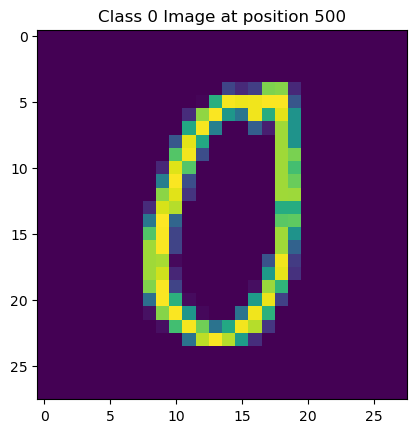

In [16]:
class MNISTDataset(Dataset):
    
    def __init__(self, data_file_path, transform=None, target_transform=None):
      """
        Generate PyTorch Dataset object from MNIST dataset in ARFF format.

        Args:
          data_file_path (str): Path to the ARFF file.
          transform (OBJ): transform operations on features
          target_transform (OBJ): transform operations on labels
      """
      # Get features and labels from dataset
      self.features, self.labels = load_mnist_from_kaggle(data_file_path)

      # Store transforms
      self.transform = feature_transform
      self.target_transform = target_transform

      # print dataset number of samples and features
      print(f"Number of samples in MNIST Dataset: {len(self.labels)}.")
      print (f"Each sample has {self.features.shape[1]} features.")


    def __len__(self):
      """
        Returns the size of the dataset.
      """
      # number of samples
      no_samples = len(self.labels)

      return no_samples

    def __getitem__(self, idx):
      """
        Select data sample at index idx and apply corresponding transformations.

        Args:
          idx (int): Index of image.

        Returns:
          dict: {'image': image, 'label': label}
      """
      # get sample
      image = self.features[idx,:]
      label = self.labels[idx]

      # Apply feature transformations
      image = self.transform(image)

      # Apply label transformations
      label = self.target_transform(label)

      return image, label

    def show_image_sample(self, idx):
      """
        Show image sample at index idx.

        Args:
          idx (int): Index of image.
      """
      # get sample at position idx and reshape to MNIST image dimensions
      image = self.features[idx,:].reshape(28, 28)

      # use matplotlib library to display the image
      plt.imshow(image)
      plt.title(f"Class {self.labels[idx]} Image at position {idx}")
      plt.show()

# Generate MNIST Train Dataset object
train_dataset = MNISTDataset(train_data_file_path, feature_transform, target_transform)

# Generate MNIST Test Dataset object
test_dataset = MNISTDataset(test_data_file_path, feature_transform, target_transform)

# Show image of train sample 500
train_dataset.show_image_sample(500)


### 1.3.2 Dataloaders

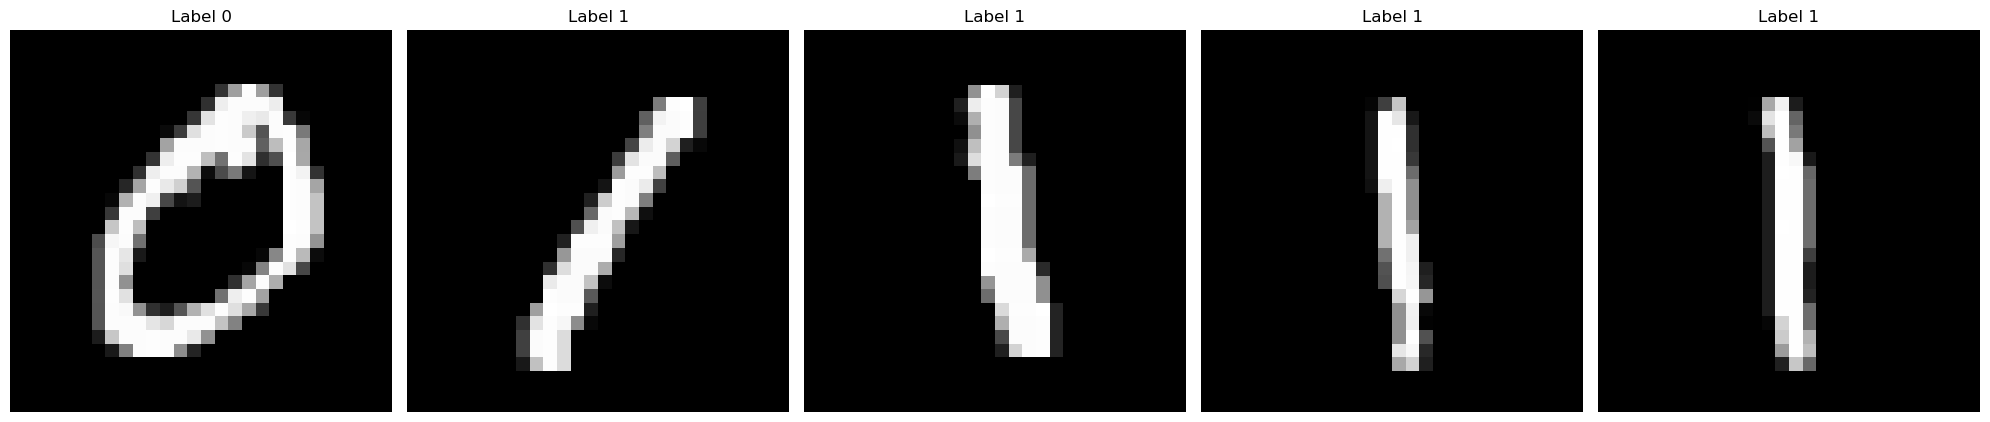

In [17]:

def display_images(image_batch, labels):
    """
    Displays images from a matrix of flattened 28x28 images.

    Args:
        image_batch (numpy.ndarray): A (N, M) matrix where each row is a flattened square image.
    """

    # Compute number of samples
    n = image_batch.shape[0]

    # Compute size of square images
    m = image_batch.shape[1]
    image_size = int( np.sqrt(m))

    if n==1:
      image = image_batch[0,:].reshape(image_size, image_size)  # Reshape to image_sizeximage_size
      plt.imshow(image, cmap='gray')      # Display image in grayscale
      plt.axis('off')                     # Turn off axis labels
      plt.title(f"Label {labels}")       # Optional title for each image
      plt.show()
    else:
      # Reshape each row back to image_size*image_size and plot
      fig, axes = plt.subplots(1, n, figsize = (20, 20)) # Create a row of n subplots
      for i, ax in enumerate(axes):
          image = image_batch[i,:].reshape(image_size, image_size) # Reshape to image_sizeximage_size
          ax.imshow(image, cmap='gray')      # Display image in grayscale
          ax.axis('off')                     # Turn off axis labels
          ax.set_title(f"Label {labels[i]}")       # Optional title for each image

      plt.tight_layout()
      plt.show()

# Test a DataLoader with training dataset and batch size of 5
batch_size = 5
dataloader = DataLoader(train_dataset, batch_size = batch_size)

# Get iterable object
dataiter = iter(dataloader)

# Sample batch
images, labels = next(dataiter)

# show images
display_images(images, labels)

# Create Train and Test dataloaders of batch size of the size of the dataset
train_dataloader = DataLoader(train_dataset, batch_size = len(train_dataset) )
test_dataloader = DataLoader(test_dataset, batch_size = len(test_dataset) )


## 2. Building a Perceptron Neuron from Scratch

**What is a Neuron?**

A neuron is the fundamental unit of neural networks. It takes multiple inputs, applies weights to them, sums them up, and uses an activation function to produce an output. This process is mathematically represented as:

$$
a = \sigma(\sum_{i=1}^{n} w_i x_i + b)
$$

- $(a)$: output of model in logits
- $(x_i)$: Inputs
- $(w_i)$: Weights
- $(b)$: Bias term
- $(\sigma)$: Activation function (e.g., sigmoid)

Below is a visual representation of a neuron:

![Artificial Neuron](https://rasbt.github.io/mlxtend/user_guide/classifier/Adaline_files/adaline_schematic.png)

I will build these components in the next tasks.


### 2.1 - Activation Function Block: Sigmoid function

Build a function that returns the sigmoid of a numpy real vector or matrix $x$.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$

This function is also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

In [18]:
def sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar or numpy vector or matrix

    Return:
    s -- sigmoid(x)
    """

    s = 1 / (1 + torch.exp( -x ))

    return s

# Test
a = torch.tensor([1])

print(f"sigmoid([1]) = {sigmoid(a)}")

if(torch.isclose(sigmoid(a), torch.tensor([0.7310585786300049]))):
    print("Test passed")

sigmoid([1]) = tensor([0.7311])
Test passed


### 2.2- Build Sigmoid Gradient
Computing gradients is an important step in backpropagation. Compute the gradient (i.e., derivative) of the sigmoid function.

**Recall**
$$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$

In [20]:
def sigmoid_gradient(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.

    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """

    # Compute Sigmoid
    sig = sigmoid(x)
    ds = sig * (1 - sig)

    return ds

# Test
a = torch.tensor([1, 2, 3])
print(f"sigmoid_gradient(a) = {sigmoid_gradient(a)}")

print(f"Test passed: {torch.isclose(sigmoid_gradient(a), torch.tensor([0.19661193, 0.10499359, 0.04517666]))}")

sigmoid_gradient(a) = tensor([0.1966, 0.1050, 0.0452])
Test passed: tensor([True, True, True])


### 2.3 Error Block: Implement Cross Entropy Loss

The cost/loss function is used to evaluate the performance of the model. The bigger loss is, the more different predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train the model and to minimize the cost.

$LogLoss(y, a) = - (y \cdot log(a) + (1-y) \cdot log(1-a))

Implement a vectorized version of the Cross Entropy or Log loss. The function will receive the samples targets and model predictions.



In [23]:


def CrossEntropy(A, Y):
    """
    Computes the LogLoss/Cross-Entropy cost.

    Arguments:
    A -- The sigmoid output of the output layer with shape (N, 1)
    Y -- "true" labels vector of shape (N, 1)

    Returns:
    cost -- cross-entropy cost as discussed in class
    """

    # number of examples
    m = Y.shape[0]

    # Manage NaNs in the logs - clamp in values for the logs
    A = torch.clamp(A, 1e-12, 1-1e-12)

    # compute LogLoss cost
    cost = -1 / m * torch.sum( Y * torch.log(A) + (1 - Y) * torch.log( 1 - A ))

    # check that we don't have nans otherwise stop
    assert not(torch.isnan(cost).any())

    cost = float(torch.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17

    return cost


# Test
A = torch.tensor( [[0.999, 0.5, 0.001]]).T
Y = torch.tensor( [[0.0, 0.0, 0.0]]).T
print(f"Test passed: Computed {CrossEntropy(A, Y)}, Answer {2.5339720249176025}")

Test passed: Computed 2.5339720249176025, Answer 2.5339720249176025


### 2.4 Model Parameters: Initialize parameters function
Implement parameter initialization 

In [24]:
def initialize_params(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of weight parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    # initialize
    w = torch.zeros( dim, 1 )
    b = float(0.0)

    return w, b

dim = 2
w, b = initialize_params(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

if((w==torch.tensor([0., 0.])).all()):
    print("Test passed")

w = tensor([[0.],
        [0.]])
b = 0.0
Test passed


### 2.5 Forward propagation

Build the forward propagation routine for the neuron that will propagate the inputs to the output of the neuron (i.e., produce a prediction).

Implement a function `model()` that computes a prediction.

**Hints**:

Forward Propagation:
- Input X, w, and b. The parameters w and b initialized with some arbitrary vector or number (e.g., vector of zeros or a zero).
- Compute $A = \sigma(X \cdot w + b)$
- Use a sigmoid activation function.

In [26]:
def model(X, W, b):
  """
  Makes a prediction based on inputs and parameters.

  Arguments:
  X -- input data of size (N, M), where N is the number of samples and M is the number of features.
  W -- weights vector of size (M, 1)
  b -- bias scalar

  Returns:
  A -- Output of activation function
  """

  # W was initially float32, convert it to float64 to match X
  X = X.to(torch.float32)  
  W = W.to(torch.float32)  

  # Compute Sigmoid activation
  intermediate = torch.matmul(X, W) + b
  A = sigmoid(intermediate)

  return A

### 2.6 Backward propagation

Build the routines to compute the cost and gradients to update the parameters.

Implement a function `cost_and_backprop()` that computes the cost function and its gradient to the parameters.

**Hints**:

Cost and backward Propagation:
- Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas used:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X \cdot (A-Y)\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [28]:
def cost_and_backprop(X, Y, A):
  """
  Computes the cost function and its gradient for the model's parameters.

  Arguments:
  X -- input data of size (N, M), where N is the number of samples and M is the number of features.
  Y -- true "label" vector of size (N, 1)
  A -- Output of activation function (Hint: Model output)

  Returns:
  cost -- cross-entropy cost
  dW -- gradient of the loss with respect to w, thus same shape as w
  db -- gradient of the loss with respect to b, thus same shape as b
  """

 # Compute cost
  cost = CrossEntropy(A, Y)

  # Number of samples
  m = X.shape[0]

  # Compute dZ
  dZ = A - Y
  
  # Ensure both are in float32 form
  dZ = dZ.to(torch.float32)  
  X = X.to(torch.float32)  
  
  # Compute dW
  dW = 1/ m * torch.matmul(X.T, dZ)

  # Compute db
  db = 1 / m * torch.sum(dZ)

  return cost, dW, db

In [30]:
# Propagate, Cost, and Backprop tests

w = torch.tensor([[1.], [2]])
b = 1.5
X = torch.tensor([[1., 3.],[-2.,0.5],[-1.,-3.2]])
Y = torch.tensor([[1], [1], [0]], dtype=torch.float32)

print(X.shape)
print(Y.shape)

# Predict
A = model(X, w, b)
print(A)

# Cost and backprop
cost, dW, db = cost_and_backprop(X, Y, A)

assert dW.shape == (2, 1)

print ("dw = " + str(dW))
print ("db = " + str(db))
print ("cost = " + str(cost))

print(f"cost test passed: {np.isclose(cost,0.15901, atol=0.00001)}")
print(f"dW test passed: {torch.isclose(dW, torch.tensor([[0.25072],[-0.06604]]), atol=0.00001)}")
print(f"db test passed: {torch.isclose(db, torch.tensor(-0.125), atol=0.00001)}")

torch.Size([3, 2])
torch.Size([3, 1])
tensor([[0.9998],
        [0.6225],
        [0.0027]])
dw = tensor([[ 0.2507],
        [-0.0660]])
db = tensor(-0.1250)
cost = 0.15900537371635437
cost test passed: True
dW test passed: tensor([[True],
        [True]])
db test passed: True


### 2.7 - Optimization
- Update the parameters using gradient descent.

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [31]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 1, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    w and b -- weights w and bias b
    dw and db -- gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):

        # Forward propagatation
        A = model(X, w, b)

        # Cost and gradient calculation
        cost, dw, db = cost_and_backprop(X, Y, A)

        # update rule
        w = w - (learning_rate *dw)
        b = b - (learning_rate * db)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    return costs, w, b, dw, db

In [32]:
w =  torch.tensor([[1.], [2]])
b = 1.5
X = torch.tensor([[1., -2., -1.], [3., 0.5, -3.2]]).T
Y = torch.tensor([[1., 1., 0.]]).T
costs, w, b, dw, db = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(w))
print ("b = " + str(b))
print ("dw = " + str(dw))
print ("db = " + str(db))
print("Costs = " + str(costs))

#checking first element of each variable only
if ((np.round(w[0].item(),5)==0.80956) and
    (np.round(b.item(),5)==1.59487) and
    (np.round(dw[0].item(),6)==0.178605) and
    (np.round(db.item(),5)==-0.08888) and
    (np.round(costs[0],4)==0.1590)):
    print("Test passed.")


w = tensor([[0.8096],
        [2.0508]])
b = tensor(1.5949)
dw = tensor([[ 0.1786],
        [-0.0484]])
db = tensor(-0.0889)
Costs = [0.15900537371635437]
Test passed.


### 2.8 Predict
The **optimize** function will output the learned w and b. Use w and b to predict the labels for a dataset X.

There are two steps to computing predictions:

1. Calculate $A = \sigma(w^T X + b)$

2. Compute $\hat{Y}$ by onverting the entries of $A$ into 0 (if activation < 0.5) or 1 (if activation >= 0.5), stores the predictions in a vector `Y_prediction`.

In [33]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 1)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = model(X, w, b)
    
    # Activation 
    Y_prediction = A >= 0.5

    return Y_prediction


# Tests
w = torch.tensor([[0.1124579], [0.23106775]])
b = -0.3
X = torch.tensor([[1., -1.1, -3.2],[1.2, 2., 0.1]]).T
YHAT = predict(w, b, X)
print ("predictions = " + str(YHAT))
if((YHAT==torch.tensor([[True,True,False]]).T).all()):
   print("Test passed.")

predictions = tensor([[ True],
        [ True],
        [False]])
Test passed.


### 2.9 Integrate functions to generate a machine learning model

The overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Create the model function using the following notation:
- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- parameters, grads, costs for the outputs of optimize()

In [34]:
#

def train_model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the functions you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (n, num_px * num_px * 1)
    Y_train -- training labels represented by a numpy array (vector) of shape (n, 1)
    X_test -- test set represented by a numpy array of shape (n_test num_px * num_px * 1)
    Y_test -- test labels represented by a numpy array (vector) of shape (n_test, 1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize - Had to get 2nd dimension in order ot fix the error
    w, b = initialize_params(X_train.shape[1])

    # train
    costs, w, b, dw, db = optimize(w, b, X_train, Y_train, num_iterations, learning_rate,print_cost)

    # Predict
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    # Print train/test Errors
    train_accuracy = torch.round(100 - torch.mean(torch.abs(Y_prediction_train.type(torch.FloatTensor) - Y_train)) * 100,decimals=3)
    test_accuracy = torch.round(100 - torch.mean(torch.abs(Y_prediction_test.type(torch.FloatTensor) - Y_test)) * 100,decimals=3)
    if print_cost:
        print("\n\n########################################")
        print("train accuracy: {} %".format(train_accuracy))
        print("test accuracy: {} %".format(test_accuracy))
        print("########################################\n")


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy}

    return d

In [37]:
# Dump full batch
dataiter = iter(train_dataloader)
# Sample batch
train_X, train_Y = next(dataiter)
dataiter = iter(test_dataloader)
# Sample batch
test_X, test_Y = next(dataiter)

train_Y = train_Y.type(torch.FloatTensor).reshape(-1, 1)
test_Y = test_Y.type(torch.FloatTensor).reshape(-1, 1)


# This function will train neuron from scratch
my_neuron = train_model(train_X, train_Y, test_X, test_Y,
                                  num_iterations=1000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.119966
Cost after iteration 200: 0.070543
Cost after iteration 300: 0.052032
Cost after iteration 400: 0.042170
Cost after iteration 500: 0.035974
Cost after iteration 600: 0.031688
Cost after iteration 700: 0.028528
Cost after iteration 800: 0.026091
Cost after iteration 900: 0.024149


########################################
train accuracy: 99.73899841308594 %
test accuracy: 99.73899841308594 %
########################################



#### Plot of training Cost

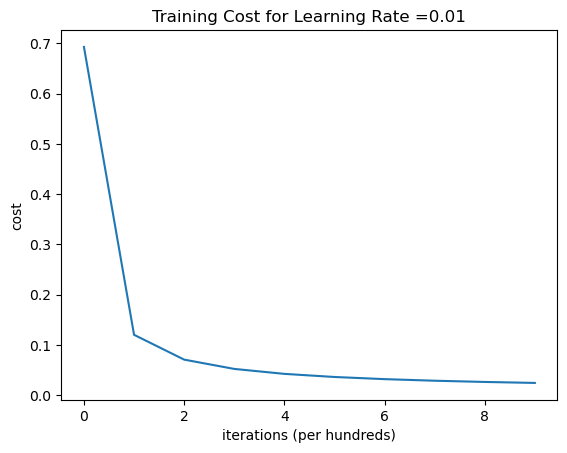

In [38]:
# Plot learning curve (with costs)
costs = np.squeeze(my_neuron['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Training Cost for Learning Rate =" + str(my_neuron["learning_rate"]))

plt.show()


### 2.10 Choice of learning rate

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely $\left(\alpha \in (0,1)\right)$. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.
**Task**
- Run the training algorithm for different learning rates.
- Plot the Cost for each experiment on the same figure.


Training a model with learning rate: 0.0001
train accuracy: 99.43199920654297 %
test accuracy: 99.43199920654297 %

-------------------------------------------------------

Training a model with learning rate: 0.001
train accuracy: 99.62899780273438 %
test accuracy: 99.62899780273438 %

-------------------------------------------------------

Training a model with learning rate: 0.01
train accuracy: 99.73899841308594 %
test accuracy: 99.73899841308594 %

-------------------------------------------------------

Training a model with learning rate: 0.1
train accuracy: 99.8499984741211 %
test accuracy: 99.8499984741211 %

-------------------------------------------------------

Training a model with learning rate: 0.5
train accuracy: 99.89700317382812 %
test accuracy: 99.89700317382812 %

-------------------------------------------------------



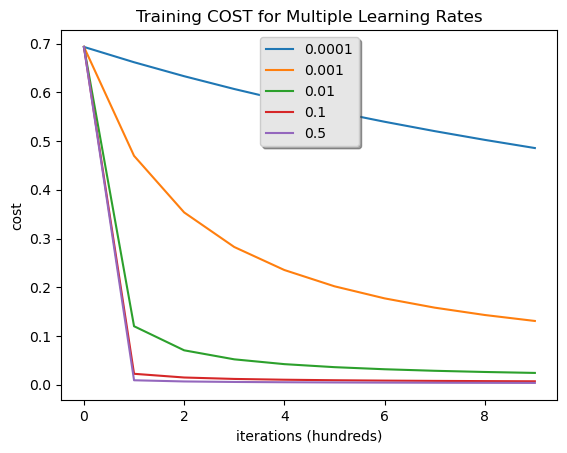

In [39]:
learning_rates = [0.0001, 0.001, .01, .1, 0.5]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = train_model(train_X, train_Y, test_X, test_Y, num_iterations=1000, learning_rate=lr, print_cost=False)
    print("train accuracy: {} %".format(models[str(lr)]["train_accuracy"]))
    print("test accuracy: {} %".format(models[str(lr)]["test_accuracy"]))
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
plt.title("Training COST for Multiple Learning Rates")
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### 2.11 Try your own handwritten 0 or 1

**Tasks**
1. Handwrite a zero or one in a white page.
2. Take a picture of your number and crop the image with a squared layout.
3. Save the picture to the data folder in JPG format and with filename `my_image.jpg`. Same folder where the MNIST dataset is located.

y = tensor(True), your algorithm predicts a "1" picture.


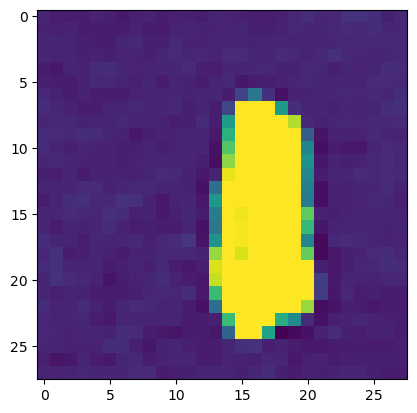

In [40]:

from PIL import Image, ImageEnhance, ImageChops

# change this to the name of your image file and data folder
fname = "my_image1.jpg"

num_px = 28

# Load and reshape the image to fit algorithm.
image = Image.open(fname).convert('L').resize((num_px, num_px))

#image = np.array(image)
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(1.5)
image = ImageChops.invert(image)

# Preprocess the image to fit your algorithm.
image = np.array(image)

# Normalize
image = image.astype(float) / 255.0

# Display image
plt.imshow(image)

# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Change to Tensor and prep for matrix multiplication
image = torch.tensor(image, dtype=torch.float32)
image = image.T

# Attempt at categorizing image
my_predicted_image = predict(my_neuron["w"], my_neuron["b"], image)

my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + str(int(my_predicted_image)) +  "\" picture.")